# RNA-seq Analysis Practical Protocol: From Cancer Biology to Therapeutic Discovery

**Course:** Gene Expression Analysis Practical Seminar  
**Duration:** 90 minutes (2 academic hours)  
**Target Audience:** Third-year pre-medical students  
**Platform:** Google Colab  
**Instructor:** Israel Barrantes


## Medical Problem & Research Question

### **Central Clinical Question:**
**"_What are the molecular differences between cancer cells and normal human tissue, and how can we use these differences to identify new therapeutic targets for cancer treatment?_"**

### **Why This Matters for Medicine:**
- **Cancer heterogeneity:** Different cancers have distinct molecular signatures
- **Precision medicine:** Treatments must be tailored to specific cancer types
- **Drug resistance:** Cancer cells evolve to evade treatment
- **Therapeutic targets:** New drugs are desperately needed for better patient outcomes

### **What We'll Discover:**
1. **Molecular cancer signatures:** Genes consistently altered in cancer vs normal tissue
2. **Therapeutic vulnerabilities:** Pathways that could be targeted with drugs
3. **Drug repositioning opportunities:** Existing drugs that might treat cancer
4. **Biomarker identification:** Genes that could predict treatment response


## Dataset: A Real Cancer vs Normal Tissue Study

**Clinical Context:** Universal Human Reference (UHR) vs Human Brain Reference (HBR)  
**Medical Relevance:** **Cancer cell lines vs normal human brain tissue**  
**Sample Size:** 6 samples (3 cancer replicates vs 3 normal brain replicates)  
**Data Type:** Paired-end RNA-sequencing (chromosome 22 subset)  
**Source:** Griffith et al. (2015) "Informatics for RNA-seq: A web resource for analysis on the cloud" *PLoS Computational Biology*

### **Medical Samples Explained:**

#### **UHR (Universal Human Reference) = CANCER SAMPLES**
- **Composition:** Total RNA from 10 different human cancer cell lines
- **Cancer types included:** Breast, liver, cervix, testis, brain, skin cancers plus immune cells (T cell, B cell, macrophage, histocyte)
- **Why this matters:** Represents the common molecular features shared across different cancer types
- **Clinical relevance:** Helps identify pan-cancer therapeutic targets

#### **HBR (Human Brain Reference) = NORMAL TISSUE CONTROLS**
- **Composition:** Total RNA from brains of 23 healthy Caucasians, mostly 60-80 years old
- **Why brain tissue:** Provides a normal tissue baseline for comparison
- **Clinical relevance:** Shows what "healthy" gene expression looks like

### **The Biological Hypothesis:**
**Cancer cells will show systematic changes in gene expression compared to normal tissue, revealing:**
1. **Oncogenes** (cancer-promoting genes) that are overexpressed
2. **Tumor suppressors** (cancer-preventing genes) that are silenced
3. **Metabolic pathways** altered to support cancer growth
4. **Drug targets** that could selectively kill cancer cells


## Learning Objectives: From Bench to Bedside

By the end of this seminar, students will:

### **Technical Skills:**
1. Perform salmon quantification on real human cancer vs normal data
2. Execute differential expression analysis to identify cancer biomarkers
3. Run pathway enrichment to understand cancer biology
4. Use computational drug repositioning for therapeutic discovery

### **Medical Understanding:**
1. **Interpret cancer gene signatures** in clinical context
2. **Identify potential biomarkers** for cancer diagnosis/prognosis
3. **Understand drug repositioning** as a strategy for faster therapeutic development
4. **Connect computational findings** to real cancer treatment decisions

### **Clinical Translation:**
1. **Evaluate therapeutic targets** identified through RNA-seq
2. **Assess drug candidates** for cancer treatment potential
3. **Understand precision medicine** approaches to cancer care


## Part 0: Software Installation and Setup (10 minutes)

### Step 0.1: Install Conda in Google Colab

After running this cell, the runtime will restart automatically. Wait for it to complete, then continue.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


### Step 0.2: Verify Conda installation

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


### Step 0.3: Install all required software and packages

In [2]:
%%bash
conda install -c bioconda -c conda-forge salmon gffread bioconductor-deseq2 r-optparse r-ggplot2 r-gprofiler2 r-dplyr r-tidyr -y -q 2>&1

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bioconductor-deseq2
    - gffread
    - r-dplyr
    - r-ggplot2
    - r-gprofiler2
    - r-optparse
    - r-tidyr
    - salmon


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    argcomplete-3.6.2          |     pyhd8ed1ab_0          41 KB  conda-forge
    binutils_impl_linux-64-2.43|       h4bf12b8_2         5.4 MB  conda-forge
    bioconductor-biobase-2.66.0|    r44h3df3fcb_0         2.6 MB  bioconda
    bioconductor-biocgenerics-0.52.0|    r44hdfd78af_3         678 KB  bioconda
    bioconductor-biocparallel-1.40.0|    r44he5774e6_1         1.6 MB  bioconda
    bioconductor-data-packages-20250625|       hdfd78af_0         250 KB  

### Step 0.4: Download Data and script repository

**Background: Version Control and Reproducible Research**

In modern bioinformatics, we use version control systems like Git to manage our analysis scripts and data. This ensures reproducibility and allows collaboration. We're downloading a repository that contains:
- Pre-processed RNA-seq data files
- Analysis scripts for each step
- Reference genome files and annotations

In [3]:
%%bash
git clone https://gitlab.uni-rostock.de/wb283/qb1rnaseq.git

Cloning into 'qb1rnaseq'...


In [4]:
%%bash
ls

condacolab_install.log
qb1rnaseq
sample_data


In [5]:
%%bash
ls -lht

total 32K
drwxr-xr-x 4 root root 4.0K Jul 18 13:59 qb1rnaseq
-rw-r--r-- 1 root root  21K Jul 18 13:56 condacolab_install.log
drwxr-xr-x 1 root root 4.0K Jul 16 13:48 sample_data


In [6]:
# Change working directory permanently
import os
os.chdir('qb1rnaseq')

In [7]:
%%bash
ls

drug_repositioning.py
griffith-data.tar.gz
load_data.R
mapping.sh
pathway_analysis.R
README.md
run_deseq2.R
samples.tsv
V57


In [8]:
%%bash
tar xzf griffith-data.tar.gz

In [9]:
%%bash
ls -lht

total 126M
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 refs
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 reads
-rw-r--r-- 1 root root 2.4K Jul 18 13:59 load_data.R
-rw-r--r-- 1 root root  385 Jul 18 13:59 mapping.sh
-rw-r--r-- 1 root root 4.0K Jul 18 13:59 pathway_analysis.R
-rw-r--r-- 1 root root 8.3K Jul 18 13:59 run_deseq2.R
-rw-r--r-- 1 root root  426 Jul 18 13:59 samples.tsv
-rw-r--r-- 1 root root 126M Jul 18 13:59 griffith-data.tar.gz
-rw-r--r-- 1 root root 6.1K Jul 18 13:59 drug_repositioning.py
-rw-r--r-- 1 root root 6.0K Jul 18 13:59 README.md
drwxr-xr-x 2 root root 4.0K Jul 18 13:59 V57


In [10]:
%%bash
head samples.tsv

sample	condition	tissue_type	clinical_context
UHR_rep1	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep1
UHR_rep2	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep2
UHR_rep3	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep3
HBR_rep1	normal	brain_tissue	Human Brain Reference Rep1
HBR_rep2	normal	brain_tissue	Human Brain Reference Rep2
HBR_rep3	normal	brain_tissue	Human Brain Reference Rep3

---

## Part 1: Gene Expression Datasets (2 minutes)

All data and scripts are now included in the repository! No separate download needed.

### Step 1.1: Verify Dataset Contents

**🧬 Background: FASTQ Files and RNA-seq Data Format**

**What are FASTQ files?**
FASTQ files contain the raw sequencing data from RNA-seq experiments. Each sequencing read is represented by 4 lines:
1. **Header line**: Starts with `@`, contains read identifier
2. **Sequence line**: The actual DNA/RNA sequence (A, T, G, C)
3. **Plus line**: Starts with `+`, sometimes repeats the identifier
4. **Quality line**: ASCII characters representing base quality scores

**Why paired-end sequencing?**
Each RNA fragment is sequenced from both ends (R1 and R2), providing:
- Better mapping accuracy
- Detection of splice junctions
- Improved quantification of gene expression

**Our dataset:**
- **UHR samples**: Mixed cancer cell lines (Universal Human Reference)
- **HBR samples**: Normal brain tissue (Human Brain Reference)
- **Chr22 subset**: Educational dataset focusing on chromosome 22 genes


In [11]:
%%bash
ls reads/

HBR_1_R1.fq
HBR_1_R2.fq
HBR_2_R1.fq
HBR_2_R2.fq
HBR_3_R1.fq
HBR_3_R2.fq
UHR_1_R1.fq
UHR_1_R2.fq
UHR_2_R1.fq
UHR_2_R2.fq
UHR_3_R1.fq
UHR_3_R2.fq


In [12]:
%%bash
# expression data
head reads/UHR_1_R1.fq

@HWI-ST718_146963544:6:1213:8996:10047/1
CTTTTTTATTTTTGTCTGACTGGGTTGATTCAAAGGTCTGGTCTTTGAGCTCTTAAATTAGTTCTTCTATTTGGCCTAGTCTGTTGCTAAGGCTGCCAAC
+
CCCFFFFFHHHHGJHIIJHIHIIIFHIJJJJIJJGIBBFGEGGHIIHGGIJJIIHGGHIIIFGCGHHIIHIHHEEE?DFEFFFEEDCEEDDDDDDDBCDD
@HWI-ST718_146963544:5:2303:11793:37095/1
ATGAATTATAGGGCTGTATTTTAATTTTGCATTTTAAATTCCTGCAGTTTTCTTCCATCACTTTTCACCATGCATTGTATACTTGGAATTGCTTTTTGTG
+
@@??BDDFFF<FHEGFFGGIEBGHIIIIIBEHIIGIH<FHEFHHCHABF@DFHGGGII<DHBFGGGGBEGGIBHG@DHGIIIH@DE>CCHF:;>@BC>@@
@HWI-ST718_146963544:6:2112:14109:7701/1
GCCCTGATGTGATTATTACACATTGCATGCCTGTGTCAAACTATCTCATGTACCCCATAAATATATACACCTACTATGTACTCATAGAAATTAAAAATAA


In [13]:
%%bash
wc -l reads/HBR_1_R1.fq

474284 reads/HBR_1_R1.fq


In [14]:
%%bash
wc -l reads/UHR_1_R1.fq | awk '{print $1/4}'

227392


In [15]:
%%bash
# Count reads per sample
for sample in UHR_1 UHR_2 UHR_3 HBR_1 HBR_2 HBR_3; do
    count=$(wc -l reads/${sample}_R1.fq | awk '{print $1/4}')
    echo "$sample: $count reads"
done

UHR_1: 227392 reads
UHR_2: 162373 reads
UHR_3: 185442 reads
HBR_1: 118571 reads
HBR_2: 144826 reads
HBR_3: 129786 reads


### Step 1.2: Examine Input Data Formats

**Background: Understanding Bioinformatics File Formats**

Let's examine the three fundamental file types used in RNA-seq analysis to understand their structure and biological meaning:

#### 1.2.1 FASTQ Format - Raw Sequencing Data

- **Line 1** (`@`): Read identifier with sequencing machine info, flow cell coordinates
- **Line 2**: DNA sequence (A, T, G, C) - this is the actual RNA converted to DNA
- **Line 3** (`+`): Separator (sometimes repeats identifier)
- **Line 4**: Quality scores - each character represents confidence in the corresponding base

**Quality scores (Phred scores):**
- High quality: `I` (Phred 40) = 99.99% accuracy
- Medium quality: `B` (Phred 33) = 99.95% accuracy  
- Low quality: `#` (Phred 2) = 37% accuracy

In [18]:
%%bash
ls -lht

total 126M
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 refs
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 reads
-rw-r--r-- 1 root root 2.4K Jul 18 13:59 load_data.R
-rw-r--r-- 1 root root  385 Jul 18 13:59 mapping.sh
-rw-r--r-- 1 root root 4.0K Jul 18 13:59 pathway_analysis.R
-rw-r--r-- 1 root root 8.3K Jul 18 13:59 run_deseq2.R
-rw-r--r-- 1 root root  426 Jul 18 13:59 samples.tsv
-rw-r--r-- 1 root root 126M Jul 18 13:59 griffith-data.tar.gz
-rw-r--r-- 1 root root 6.1K Jul 18 13:59 drug_repositioning.py
-rw-r--r-- 1 root root 6.0K Jul 18 13:59 README.md
drwxr-xr-x 2 root root 4.0K Jul 18 13:59 V57


In [16]:
%%bash
# expression data
head reads/UHR_1_R2.fq

@HWI-ST718_146963544:6:1213:8996:10047/2
ATTTGAATGACAAGATAGCTATATTGAAAAAGAACCAAGCAGAGCTTCTTGAATTGAAAAATTTACTATAGGAATTTCAAAAAGAGTTGGCAGCCTTAGC
+
@B@DDFFFHHHHHJDHFHIGIIGHE>EFHIJJJJJIJJIDHGGDEGHCHEDEGIGABGIJJGGHHGGGEGI@HIEHHHHHHFFD?>3>>CCCBDBC>CD:
@HWI-ST718_146963544:5:2303:11793:37095/2
GGGTAATTATTAAAACATTAAGAAATACTCTTTAATCATATATGTTTAAACTTGTAGAAAATCAATAACATACAAGTAAAGAAGATCAAGAAGCCACAAA
+
?+?:BDDA?AFHHIIGHEHGGGGGGEGIIEGGG<DGHIIGIHAC<?:DDDCFAEFGBGGIHIGGGHIIDHGHHHFF8@GICHG;DA=AEFEEEE>CC>=B
@HWI-ST718_146963544:6:2112:14109:7701/2
CTGCAGATGGGGGCCTGGATCATGTGGAAAGATGACGTGAAGGTCACACCTGTCAGGGACCAGTGCTGGAGGGCAAACCTCACCTTTAAAAGCTCCCACT


#### 1.2.2 GTF Format - Gene Annotations

- **Column 1**: Chromosome name (22)
- **Column 2**: Annotation source (HAVANA, ENSEMBL)
- **Column 3**: Feature type (gene, transcript, exon, CDS)
- **Column 4-5**: Start and end coordinates (1-based)
- **Column 6**: Score (usually `.` for missing)
- **Column 7**: Strand (`+` forward, `-` reverse)
- **Column 8**: Frame (for coding sequences)
- **Column 9**: Attributes (gene_id, gene_name, transcript_id, etc.)

**Medical relevance:**
- Tells us where genes are located on the chromosome
- Defines exon boundaries (coding regions)
- Links gene IDs to human-readable gene names
- Essential for quantifying expression accurately


In [17]:
%%bash
ls refs/

22.fa
22.gtf
ERCC92.fa
ERCC92.gtf


In [19]:
%%bash
# transcriptome annotations
head refs/22.gtf

chr22	ENSEMBL	gene	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; level 3;
chr22	ENSEMBL	transcript	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; transcript_id "ENST00000615943.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; transcript_type "snRNA"; transcript_status "NOVEL"; transcript_name "U2.14-201"; level 3; tag "basic"; transcript_support_level "NA";
chr22	ENSEMBL	exon	10736171	10736283	.	-	.	gene_id "ENSG00000277248.1"; transcript_id "ENST00000615943.1"; gene_type "snRNA"; gene_status "NOVEL"; gene_name "U2"; transcript_type "snRNA"; transcript_status "NOVEL"; transcript_name "U2.14-201"; exon_number 1; exon_id "ENSE00003736336.1"; level 3; tag "basic"; transcript_support_level "NA";
chr22	ENSEMBL	gene	10936023	10936161	.	-	.	gene_id "ENSG00000274237.1"; gene_type "miRNA"; gene_status "NOVEL"; gene_name "CU459211.1"; level 3;
chr22	ENSEMBL	transcript	10936023	10936161	.	-	.	gene_id "ENSG00000274237.

#### 1.2.3 FASTA Format - Genome Sequence

- **Header line** (`>`): Sequence identifier and description
- **Sequence lines**: Raw DNA sequence (A, T, G, C, N)
  - `A` = Adenine
  - `T` = Thymine  
  - `G` = Guanine
  - `C` = Cytosine
  - `N` = Unknown/ambiguous base

**Biological context:**
- This is the reference genome sequence for chromosome 22
- Contains ~51 million base pairs
- Includes both coding (genes) and non-coding regions
- Used as a template to identify where RNA-seq reads originated

**How these files work together:**
1. **FASTQ files**: Contain the expression experimental data (what we measured)
2. **GTF file**: Tells us where genes are located (the map)
3. **FASTA file**: Provides the reference sequence (the genome sequence blueprint)

Together, they allow us to determine which genes the RNA-seq reads came from and quantify their expression levels.

In [20]:
%%bash
# sequence data
head refs/22.fa

>chr22
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


## Part 2: Build Transcriptome and Quantify Expression (15 minutes)

### Step 2.1: Extract Transcriptome and Build Salmon Index

**🧬 Background: Transcriptomes vs Genomes for RNA-seq Analysis**

**Why extract a transcriptome?**
- **Genome**: Contains all DNA sequences including introns, exons, and regulatory regions
- **Transcriptome**: Contains only the mature mRNA sequences (exons spliced together)
- **RNA-seq reads**: Come from mature mRNA, so they match transcriptome sequences

**What is gffread doing?**
The `gffread` tool reads the GTF annotation file to identify exon coordinates, then extracts and splices these exonic sequences from the genome to create a transcriptome FASTA file.

**What is a Salmon index?**
Salmon uses a sophisticated indexing strategy that creates:
- A compressed representation of all transcripts
- K-mer (short sequence) lookup tables for fast mapping
- This allows ultra-fast quantification without traditional alignment

**Clinical relevance:**
Accurate quantification is essential for identifying biomarkers and therapeutic targets in cancer research.


In [21]:
%%bash
gffread -w chr22_transcriptome.fa -g refs/22.fa refs/22.gtf

FASTA index file refs/22.fa.fai created.


In [22]:
%%bash
head chr22_transcriptome.fa

>ENST00000615943.1
ATCACTTCTCGGCCTTTTGGCTAAGATCAACTGTAGTATCTGTTGTTATTAATATAATATTGTATATTCA
ACCAATTGTCAATACAAGGCTGTTTGTATCTGATATGAACCAA
>ENST00000618365.1
AGCATGCCCAGTTAATTTGAAATTTCAGATAAACAAATACTTTTTTCAGTGTAAGTATATCCCATACAAT
ATTTGGGACATGCTTATACTAAAATATTATTCCTTATTTATCTGAAATTGAAATTTAACTGGGTATTAC
>ENST00000623473.1 CDS=1-54
GCTGCAGGCAGTGTTCTTCTGTGTCTGCTCACCGAGCTGCTCCGAGCCCGGCTT
>ENST00000624155.1 CDS=1-120
ATGGCAGCCGGAGCGGTTTTTCTGGCATTGTCTGCCCAGCTGCTCCAAGCCAGACTGATGAAGGAGGAGT


In [23]:
%%bash
salmon index -t chr22_transcriptome.fa -i salmon_index -k 31 2>&1

Version Server Response: Not Found
index ["salmon_index"] did not previously exist  . . . creating it
[2025-07-18 14:04:05.946] [jLog] [warning] The salmon index is being built without any decoy sequences.  It is recommended that decoy sequence (either computed auxiliary decoy sequence or the genome of the organism) be provided during indexing. Further details can be found at https://salmon.readthedocs.io/en/latest/salmon.html#preparing-transcriptome-indices-mapping-based-mode.
[2025-07-18 14:04:05.946] [jLog] [info] building index
out : salmon_index
[2025-07-18 14:04:05.946] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers

[2025-07-18 14:04:06.411] [puff::index::jointLog] [warning] Removed 5 transcripts that were sequence duplicates of indexed transcripts.
[2025-07-18 14:04:06.411] [puff::index::jointLog] [warning] If you wish to retain duplicate transcripts, please use the `--keepDuplicates` flag
[2025-07-18 14:04:06.412] [puff::index::jointLog] [info

### Step 2.2: Quantify All Samples

**Background: RNA-seq Quantification with Salmon**

**What is RNA-seq quantification?**
RNA-seq quantification determines how many RNA molecules (gene expression level) were present in each sample for each gene. This process involves:

1. **Mapping reads**: Determining which gene/transcript each sequencing read came from
2. **Counting**: Tallying how many reads map to each gene
3. **Normalization**: Adjusting for sequencing depth and gene length differences

**How does Salmon work?**
Unlike traditional aligners, Salmon uses:
- **Lightweight mapping**: Fast probabilistic assignment of reads to transcripts
- **EM algorithm**: Handles reads that map to multiple transcripts
- **Bias correction**: Accounts for sequence composition and positional biases

**Command parameters explained:**
- `-i salmon_index`: Use our pre-built index
- `-l A`: Auto-detect library type (paired-end, strand-specific, etc.)
- `-1` and `-2`: Forward and reverse read files (paired-end)
- `-o`: Output directory for results
- `-q`: Quiet mode (less verbose output)

**Medical significance:**
Gene expression differences between cancer and normal samples reveal:
- Oncogenes (overexpressed in cancer)
- Tumor suppressors (underexpressed in cancer)
- Potential therapeutic targets

In [24]:
%%bash
mkdir -p salmon_quant

In [25]:
%%bash
ls -lht

total 133M
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 salmon_quant
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 salmon_index
-rw-r--r-- 1 root root 7.0M Jul 18 14:04 chr22_transcriptome.fa
drwxr-xr-x 2 root root 4.0K Jul 18 14:03 refs
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 reads
-rw-r--r-- 1 root root 2.4K Jul 18 13:59 load_data.R
-rw-r--r-- 1 root root  385 Jul 18 13:59 mapping.sh
-rw-r--r-- 1 root root 4.0K Jul 18 13:59 pathway_analysis.R
-rw-r--r-- 1 root root 8.3K Jul 18 13:59 run_deseq2.R
-rw-r--r-- 1 root root  426 Jul 18 13:59 samples.tsv
-rw-r--r-- 1 root root 126M Jul 18 13:59 griffith-data.tar.gz
-rw-r--r-- 1 root root 6.1K Jul 18 13:59 drug_repositioning.py
-rw-r--r-- 1 root root 6.0K Jul 18 13:59 README.md
drwxr-xr-x 2 root root 4.0K Jul 18 13:59 V57


In [26]:
%%bash
bash mapping.sh

Version Server Response: Not Found
-----------------------------------------
| Loading contig table | Time = 10.835 ms
-----------------------------------------
size = 26801
-----------------------------------------
| Loading contig offsets | Time = 328.77 us
-----------------------------------------
-----------------------------------------
| Loading reference lengths | Time = 195.46 us
-----------------------------------------
-----------------------------------------
| Loading mphf table | Time = 6.6866 ms
-----------------------------------------
size = 4015079
Number of ones: 26800
Number of ones per inventory item: 512
Inventory entries filled: 53
-----------------------------------------
| Loading contig boundaries | Time = 9.9261 ms
-----------------------------------------
size = 4015079
-----------------------------------------
| Loading sequence | Time = 3.3349 ms
-----------------------------------------
size = 3211079
-----------------------------------------
| Loading pos

In [27]:
%%bash
cat mapping.sh

#!/bin/bash

# Cancer samples
for rep in 1 2 3; do
    salmon quant -i salmon_index -l A \
        -1 reads/UHR_${rep}_R1.fq -2 reads/UHR_${rep}_R2.fq \
        -o salmon_quant/UHR_rep${rep} -q
done

# Normal samples
for rep in 1 2 3; do
    salmon quant -i salmon_index -l A \
        -1 reads/HBR_${rep}_R1.fq -2 reads/HBR_${rep}_R2.fq \
        -o salmon_quant/HBR_rep${rep} -q
done

### Step 2.3: Examine Salmon Quantification Results

**Background: Understanding Salmon Output Format**

**What is in the `quant.sf` file?**
Salmon produces a quantification file (quant.sf) for each sample containing the estimated expression levels for all transcripts. This file is the core output that we'll use for downstream differential expression analysis.

**Let's examine the quantification results:**

In [29]:
%%bash
ls -lht salmon_quant/

total 24K
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 HBR_rep3
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 HBR_rep2
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 HBR_rep1
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 UHR_rep3
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 UHR_rep2
drwxr-xr-x 5 root root 4.0K Jul 18 14:04 UHR_rep1


In [30]:
%%bash
ls -lht salmon_quant/HBR_rep1/

total 228K
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 aux_info
-rw-r--r-- 1 root root  547 Jul 18 14:04 lib_format_counts.json
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 libParams
-rw-r--r-- 1 root root 205K Jul 18 14:04 quant.sf
-rw-r--r-- 1 root root  235 Jul 18 14:04 cmd_info.json
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 logs


In [31]:
%%bash
head salmon_quant/HBR_rep1/quant.sf

Name	Length	EffectiveLength	TPM	NumReads
ENST00000615943.1	113	5.574	0.000000	0.000
ENST00000618365.1	139	16.260	0.000000	0.000
ENST00000623473.1	54	54.000	0.000000	0.000
ENST00000624155.1	120	8.405	0.000000	0.000
ENST00000422332.1	1241	1067.832	0.000000	0.000
ENST00000612732.1	151	21.745	0.000000	0.000
ENST00000614148.1	115	6.325	0.000000	0.000
ENST00000614087.1	73	73.000	0.000000	0.000
ENST00000621672.1	82	82.000	0.000000	0.000


In [32]:
%%bash
tail salmon_quant/HBR_rep1/quant.sf

ENST00000468451.1	561	387.874	177.575031	1.347
ENST00000464740.1	612	438.874	0.000000	0.000
ENST00000413505.1	391	218.190	931.527567	3.976
ENST00000467796.5	813	639.871	0.000000	0.000
ENST00000462238.5	1009	835.832	378.997070	6.196
ENST00000463325.5	528	354.902	0.000000	0.000
ENST00000494075.5	857	683.832	0.000000	0.000
ENST00000423888.5	658	484.874	0.000000	0.000
ENST00000480246.1	2987	2813.832	614.189956	33.804
ENST00000427528.1	469	295.939	0.000000	0.000


**Understanding the quant.sf format:**

**Column explanations:**
- **Name**: Transcript identifier (from our GTF annotation file)
- **Length**: Effective transcript length in base pairs (accounts for fragment length distribution)
- **EffectiveLength**: Length used for TPM calculation (adjusted for sequencing biases)
- **TPM**: **Transcripts Per Million** - normalized expression measure
- **NumReads**: Estimated number of reads assigned to this transcript (what we'll use for DESeq2)

**Why these metrics matter:**

**TPM (Transcripts Per Million):**
- **Normalized measure**: Accounts for both sequencing depth and transcript length
- **Comparable across samples**: Same TPM value means same expression level
- **Range**: 0 to very high (no upper limit)
- **Interpretation**: TPM of 1 means 1 transcript per million transcripts in the sample

**NumReads (Read Counts):**
- **Raw abundance**: Actual number of sequencing reads assigned to each transcript
- **Statistical analysis**: Used by DESeq2 for differential expression testing
- **Integer values**: Whole numbers suitable for count-based statistical models
- **Not normalized**: Higher values could mean higher expression OR deeper sequencing

**Length vs EffectiveLength:**
- **Length**: Actual transcript length from annotation
- **EffectiveLength**: Adjusted for experimental biases (GC content, positional bias)
- **Importance**: Longer transcripts naturally get more reads, so normalization is crucial

**Clinical Relevance:**
- **Biomarker discovery**: TPM values help identify consistently expressed genes
- **Drug targets**: NumReads provides statistical power for finding significant differences
- **Personalized medicine**: Expression levels guide treatment decisions

**What to expect:**
- **High TPM/NumReads**: Highly expressed genes (often housekeeping genes)
- **Zero values**: Genes not expressed in this tissue/condition
- **Intermediate values**: Tissue-specific or condition-dependent expression

---

## Part 3: Differential Expression Analysis (20 minutes)

### Step 3.1: Load Libraries and Data

**Background: Data Import and Preparation for Statistical Analysis**

**What is our R script doing?**
The `load_data.R` script performs several critical steps:

1. **Data Integration**: Combines salmon results from all 6 samples into a single count matrix
2. **Sample Annotation**: Creates metadata linking each sample to its experimental condition
3. **Quality Control**: Checks data integrity and reports basic statistics
4. **Format Preparation**: Converts data into the format required for DESeq2 analysis

**Why use count data?**
- **Raw counts**: Represent the actual number of sequencing reads per gene
- **Statistical requirements**: Count-based statistical models (like DESeq2) need integer counts
- **Comparability**: Counts can be normalized across samples for fair comparison

**Medical context:**
This step transforms raw sequencing data into a format suitable for identifying genes that are differentially expressed between cancer and normal tissue.


In [34]:
%%bash
ls -lht

total 133M
drwxr-xr-x 8 root root 4.0K Jul 18 14:04 salmon_quant
drwxr-xr-x 2 root root 4.0K Jul 18 14:04 salmon_index
-rw-r--r-- 1 root root 7.0M Jul 18 14:04 chr22_transcriptome.fa
drwxr-xr-x 2 root root 4.0K Jul 18 14:03 refs
drwxr-xr-x 2 root root 4.0K Jul 18 14:00 reads
-rw-r--r-- 1 root root 2.4K Jul 18 13:59 load_data.R
-rw-r--r-- 1 root root  385 Jul 18 13:59 mapping.sh
-rw-r--r-- 1 root root 4.0K Jul 18 13:59 pathway_analysis.R
-rw-r--r-- 1 root root 8.3K Jul 18 13:59 run_deseq2.R
-rw-r--r-- 1 root root  426 Jul 18 13:59 samples.tsv
-rw-r--r-- 1 root root 126M Jul 18 13:59 griffith-data.tar.gz
-rw-r--r-- 1 root root 6.1K Jul 18 13:59 drug_repositioning.py
-rw-r--r-- 1 root root 6.0K Jul 18 13:59 README.md
drwxr-xr-x 2 root root 4.0K Jul 18 13:59 V57


In [36]:
%%bash
cat samples.tsv

sample	condition	tissue_type	clinical_context
UHR_rep1	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep1
UHR_rep2	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep2
UHR_rep3	cancer	mixed_cancer_cell_lines	Universal Human Reference Rep3
HBR_rep1	normal	brain_tissue	Human Brain Reference Rep1
HBR_rep2	normal	brain_tissue	Human Brain Reference Rep2
HBR_rep3	normal	brain_tissue	Human Brain Reference Rep3

In [37]:
%%bash
# 2025-07-14
Rscript load_data.R --input salmon_quant/ --metadata samples.tsv --output counts.tsv

Reading salmon quantification files...
Count matrix written to: counts.tsv 
Dimensions: 4501 genes x 6 samples


### Step 3.1.1: Examine the Count Matrix

**Background: Understanding the Gene Expression Count Matrix**

**What is a count matrix?**
The count matrix is the fundamental data structure for RNA-seq analysis. It's a table where:
- **Rows**: Represent genes/transcripts
- **Columns**: Represent samples (cancer_rep1, cancer_rep2, etc.)
- **Values**: Number of sequencing reads assigned to each gene in each sample

**Why is this important?**
- **Statistical foundation**: All differential expression analysis starts with this matrix
- **Data quality**: Allows us to spot potential issues before analysis
- **Biological insight**: Shows which genes are highly vs lowly expressed
- **Clinical relevance**: Forms the basis for identifying cancer biomarkers

**Let's examine our count matrix:**


In [39]:
%%bash
wc -l counts.tsv

4502 counts.tsv


In [38]:
%%bash
head counts.tsv

	UHR_rep1	UHR_rep2	UHR_rep3	HBR_rep1	HBR_rep2	HBR_rep3
ENST00000615943.1	0	0	0	0	0	0
ENST00000618365.1	0	0	0	0	0	0
ENST00000623473.1	0	0	0	0	0	0
ENST00000624155.1	0	0	0	0	0	0
ENST00000422332.1	0	1	0	0	0	0
ENST00000612732.1	0	0	0	0	0	0
ENST00000614148.1	0	0	0	0	0	0
ENST00000614087.1	0	0	0	0	0	0
ENST00000621672.1	0	0	0	0	0	0


In [40]:
%%bash
tail counts.tsv

ENST00000468451.1	0	0	1	1	0	0
ENST00000464740.1	2	1	1	0	0	1
ENST00000413505.1	4	3	1	4	1	0
ENST00000467796.5	0	0	0	0	6	0
ENST00000462238.5	6	5	6	6	10	9
ENST00000463325.5	0	0	0	0	0	0
ENST00000494075.5	0	0	4	0	8	1
ENST00000423888.5	0	2	3	0	0	0
ENST00000480246.1	16	10	16	34	32	45
ENST00000427528.1	0	0	0	0	0	0


**Understanding the count matrix structure:**

**Gene_ID Column:**
- **Transcript identifiers**: From our GTF annotation file
- **ENST format**: Ensembl transcript IDs (e.g., ENST00000215832.4)
- **Version numbers**: The `.4` indicates annotation version
- **Biological meaning**: Each ID represents a specific mRNA transcript

**Sample Columns:**
- **cancer_rep1, cancer_rep2, cancer_rep3**: Three biological replicates of cancer cell lines
- **normal_rep1, normal_rep2, normal_rep3**: Three biological replicates of normal brain tissue
- **Replication importance**: Multiple replicates allow statistical testing

**Count Values:**
- **Integer numbers**: Whole read counts (0, 1, 2, 150, 5000, etc.)
- **Dynamic range**: From 0 (not expressed) to tens of thousands (highly expressed)
- **Raw counts**: Not yet normalized for library size or gene length

**What the numbers tell us:**

| Genes | High count values | Medium count values | Low count values | Zero count values |
| --- | --- | --- | --- | --- |
| Counts range | >1000 | 10-1000 | 0-10 | 0 |
| Typical content | <ul><li>Housekeeping genes: Essential cellular functions (ribosomal proteins, metabolism)</li><li>Tissue-specific genes: Genes characteristic of the tissue type</li><li>Abundant transcripts: Genes producing lots of mRNA | <ul><li>Regulated genes: Genes that may change between conditions</li><li>Functional specialization: Genes involved in specific biological processes</li><li>Potential biomarkers: Candidates for differential expression</li></ul> | <ul><li>Lowly expressed genes: Genes with minimal transcription</li><li>Tissue-inappropriate genes: Genes not typically expressed in this tissue</li><li>Technical noise: Some low counts may be background</li></ul> | <ul><li>Not expressed: Gene is turned off in this sample/condition</li><li>Below detection: Expression too low to detect reliably</li><li>Technical artifacts: Missing due to technical limitations</li></ul> |


**Clinical and Research Implications:**

**Quality indicators:**
- **Similar patterns**: Replicates should show similar count patterns
- **Dynamic range**: Healthy samples should show diverse expression levels
- **Library sizes**: Total counts should be similar across samples

**Biological insights:**
- **Condition differences**: Cancer vs normal samples may show different patterns
- **Gene expression hierarchy**: Most genes lowly expressed, few highly expressed
- **Functional categories**: Different gene types have characteristic expression levels

This count matrix serves as the foundation for identifying genes that are differentially expressed between cancer and normal tissue, which will guide our search for therapeutic targets.

### Step 3.2: Run Differential Expression Analysis

**Background: Statistical Analysis with DESeq2**

**What is differential expression analysis?**
Differential expression analysis identifies genes whose expression levels significantly differ between experimental conditions (cancer vs normal). This involves:

1. **Normalization**: Adjusting for differences in sequencing depth and composition
2. **Variance modeling**: Estimating biological and technical variability
3. **Statistical testing**: Using negative binomial models to test for significant differences
4. **Multiple testing correction**: Adjusting p-values for testing thousands of genes simultaneously

**How does DESeq2 work?**
DESeq2 uses sophisticated statistical methods:
- **Size factors**: Normalize for sequencing depth differences
- **Dispersion estimation**: Model gene-specific variance
- **Wald test**: Test for significant expression differences
- **Benjamini-Hochberg**: Control false discovery rate

**Key outputs:**
- **Log2 fold change**: Magnitude of expression difference
- **P-value**: Statistical significance of the difference
- **Adjusted p-value**: Corrected for multiple testing

**Clinical interpretation:**
- **Positive fold change**: Higher expression in cancer (potential oncogenes)
- **Negative fold change**: Lower expression in cancer (potential tumor suppressors)

In [41]:
%%bash
# 2025-07-14
Rscript run_deseq2.R \
    --metadata samples.tsv \
    --expression counts.tsv \
    --output-degs degs.tsv \
    --output-plots pca_plot.png,heatmap.png,volcano_plot.png \
    --output-image deseq2_results.RData

Reading input files...
Retained 1568 genes for analysis
Running DESeq2 analysis...
Extracting gene symbols from GTF file...
Mapped 1568 out of 1568 transcripts to gene symbols
Differentially expressed genes written to: degs.tsv 
Generating plots...
null device 
          1 
Checking genes for heatmap...
Genes in res_df: 1467 
Genes in vsd: 1568 
Overlapping genes: 0 
No overlap found, using top genes from vsd directly...
Selected 20 genes for heatmap
Heatmap saved to: heatmap.png 
null device 
          1 
Analysis complete. Plots saved as: pca_plot.png, heatmap.png, volcano_plot.png 
R workspace saved as: deseq2_results.RData 


Warning message:
package ‘DESeq2’ was built under R version 4.4.3 
using ntop=500 top features by variance


In [42]:
%%bash
head degs.tsv

transcript_id	gene_symbol	log2FoldChange	padj
ENST00000328933.9	SYNGR1	-5.45209894653372	4.02415634072988e-199
ENST00000396425.7	SEPT3	-4.34652634627324	1.21010482611315e-195
ENST00000407418.7	CBX6	-1.91304910443322	5.27163049477453e-136
ENST00000333039.2	NPTXR	-3.26620516938627	1.22261582468185e-105
ENST00000262795.5	SHANK3	-4.08019867467502	5.92978305953308e-98
ENST00000255882.10	PI4KA	-2.32397281216817	1.06965399258861e-93
ENST00000329492.5	MAPK8IP2	-5.76918343495604	6.11459082907164e-80
ENST00000216181.9	MYH9	1.68466033421801	7.09213910687398e-79
ENST00000341184.6	MGAT3	-4.06192257106685	1.36449702826143e-76


In [43]:
%%bash
grep "ENST00000328933.9" refs/22.gtf | cut -f9

gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SYNGR1"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SYNGR1-001"; level 2; protein_id "ENSP00000332287.5"; tag "basic"; transcript_support_level "1"; tag "appris_principal_1"; tag "CCDS"; ccdsid "CCDS13989.1"; havana_gene "OTTHUMG00000030978.4"; havana_transcript "OTTHUMT00000075866.2";
gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "SYNGR1"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "SYNGR1-001"; exon_number 1; exon_id "ENSE00001881197.1"; level 2; protein_id "ENSP00000332287.5"; tag "basic"; transcript_support_level "1"; tag "appris_principal_1"; tag "CCDS"; ccdsid "CCDS13989.1"; havana_gene "OTTHUMG00000030978.4"; havana_transcript "OTTHUMT00000075866.2";
gene_id "ENSG00000100321.14"; transcript_id "ENST00000328933.9

### Step 3.3: Create Visualization Plots

**Background: Data Visualization for Biological Interpretation**

**Why visualize RNA-seq results?**
Visualization helps us understand complex datasets and communicate findings effectively. Our three key plots serve different purposes:

**1. PCA Plot (Principal Component Analysis):**
- **Purpose**: Shows overall similarity/differences between samples
- **What it reveals**: Whether cancer and normal samples cluster separately
- **Clinical significance**: Validates that cancer has distinct molecular signatures

**2. Volcano Plot:**
- **Purpose**: Displays both statistical significance and biological magnitude
- **X-axis**: Log2 fold change (magnitude of difference)
- **Y-axis**: -log10 p-value (statistical significance)
- **Clinical significance**: Identifies the most promising therapeutic targets

**3. Heatmap:**
- **Purpose**: Shows expression patterns of top differentially expressed genes
- **Colors**: Red = high expression, Blue = low expression
- **Clinical significance**: Reveals potential biomarkers for cancer diagnosis

**Our visualization script:**
Uses professional ggplot2 graphics to create publication-quality figures suitable for scientific papers and clinical presentations.

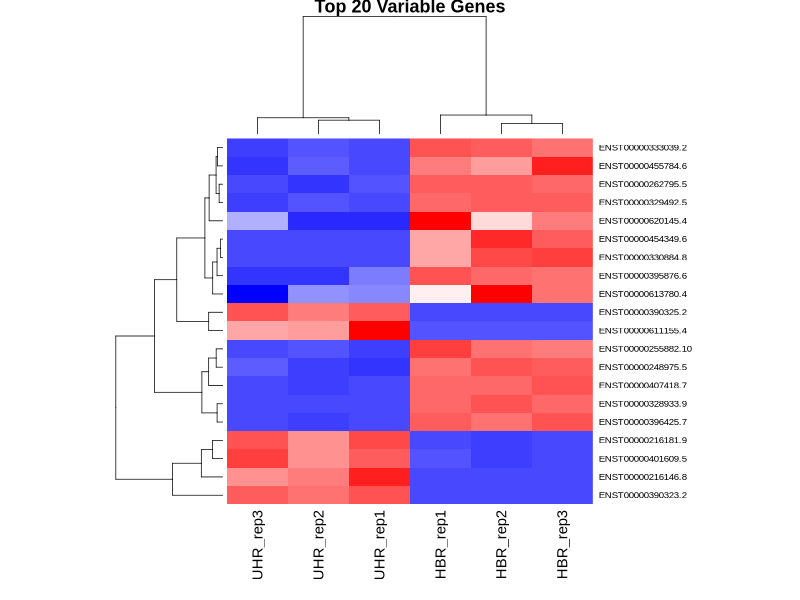

In [44]:
from IPython.display import Image, display
import os

display(Image('heatmap.png'))

Now let's see the annotations of one of these transcripts, e.g. `ENST00000390323.2`:

In [45]:
%%bash
# Annotations from differentially expressed genes
grep "ENST00000390323.2" refs/22.gtf | cut -f9

gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_type "IG_C_gene"; gene_status "KNOWN"; gene_name "IGLC2"; transcript_type "IG_C_gene"; transcript_status "KNOWN"; transcript_name "IGLC2-001"; level 2; protein_id "ENSP00000374856.2"; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "basic"; transcript_support_level "NA"; tag "appris_principal_1"; havana_gene "OTTHUMG00000151214.3"; havana_transcript "OTTHUMT00000321818.3";
gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_type "IG_C_gene"; gene_status "KNOWN"; gene_name "IGLC2"; transcript_type "IG_C_gene"; transcript_status "KNOWN"; transcript_name "IGLC2-001"; exon_number 1; exon_id "ENSE00001721671.2"; level 2; protein_id "ENSP00000374856.2"; tag "mRNA_start_NF"; tag "cds_start_NF"; tag "basic"; transcript_support_level "NA"; tag "appris_principal_1"; havana_gene "OTTHUMG00000151214.3"; havana_transcript "OTTHUMT00000321818.3";
gene_id "ENSG00000211677.2"; transcript_id "ENST00000390323.2"; gene_typ

---

## Part 4: Pathway Analysis (15 minutes)

### Step 4.1: Run Pathway Analysis

**Background: Understanding Biological Pathways in Cancer**

**What is pathway enrichment analysis?**
Instead of looking at individual genes, pathway analysis examines groups of genes that work together in biological processes. This helps us understand:

**1. Biological mechanisms:** How cancer disrupts normal cellular functions
**2. Therapeutic targets:** Which pathways could be targeted with drugs
**3. Disease understanding:** The underlying biology of cancer progression

**How does pathway enrichment work?**
1. **Gene sets**: Pre-defined groups of genes involved in specific biological processes
2. **Statistical testing**: Determines if cancer-associated genes are overrepresented in specific pathways
3. **Databases used**:
   - **GO (Gene Ontology)**: Biological processes, molecular functions
   - **KEGG**: Metabolic and signaling pathways
   - **Reactome**: Detailed biological reactions

**Expected cancer pathways:**
- **Upregulated**: Cell cycle, DNA replication, metabolic reprogramming
- **Downregulated**: Apoptosis, DNA repair, immune response

**Clinical relevance:**
Pathway analysis reveals which biological systems are disrupted in cancer, guiding therapeutic strategies and drug development.

In [46]:
%%bash
Rscript pathway_analysis.R --input degs.tsv --output pathway_results.tsv

Reading differential expression results...
Found 307 significant genes for pathway analysis
Upregulated genes: 146 
Downregulated genes: 161 
Running pathway enrichment for upregulated genes...
Running pathway enrichment for downregulated genes...
Pathway enrichment results written to: pathway_results.tsv 
Total significant pathways found: 98 

Top 10 enriched pathways:
                                                term_name      p_value
88           modulation of chemical synaptic transmission 0.0009079101
89                 regulation of trans-synaptic signaling 0.0009079101
90                         chemical synaptic transmission 0.0009554070
91                   anterograde trans-synaptic signaling 0.0009554070
92                               trans-synaptic signaling 0.0009554070
93                                     synaptic signaling 0.0011636579
94                                    cell-cell signaling 0.0053331506
1  establishment of protein localization to mitochondrion 0

In [47]:
%%bash
head pathway_results.tsv

query	source	term_id	term_name	term_size	query_size	intersection_size	p_value	direction
query_1	GO:BP	GO:0050804	modulation of chemical synaptic transmission	513	84	12	0.000907910106784905	downregulated
query_1	GO:BP	GO:0099177	regulation of trans-synaptic signaling	514	84	12	0.000907910106784905	downregulated
query_1	GO:BP	GO:0007268	chemical synaptic transmission	775	84	14	0.000955406991424698	downregulated
query_1	GO:BP	GO:0098916	anterograde trans-synaptic signaling	775	84	14	0.000955406991424698	downregulated
query_1	GO:BP	GO:0099537	trans-synaptic signaling	781	84	14	0.000955406991424698	downregulated
query_1	GO:BP	GO:0099536	synaptic signaling	807	84	14	0.00116365787526633	downregulated
query_1	GO:BP	GO:0007267	cell-cell signaling	1342	84	17	0.00533315058684575	downregulated
query_1	GO:BP	GO:0072655	establishment of protein localization to mitochondrion	123	85	6	0.00745593566650851	upregulated
query_1	GO:BP	GO:0070585	protein localization to mitochondrion	132	85	6	0.007455935666

---

## Part 5: Drug Repositioning (10 minutes)

### 5.1 Drug Repositioning in Cancer Research

**What is drug repositioning?**
Drug repositioning (also called drug repurposing) involves finding new therapeutic uses for existing drugs. This approach offers several advantages:

1. **Faster development**: 5-10 years vs 15-20 years for new drugs
2. **Known safety profiles**: Existing drugs have established safety data
3. **Lower costs**: Reduces the risk and expense of drug development
4. **Immediate clinical application**: Can be prescribed off-label in some cases

**How does computational drug repositioning work?**
Our approach uses gene expression signatures:
1. **Cancer signature**: Lists of oncogenes (upregulated) and tumor suppressors (downregulated)
2. **Drug effects database**: How thousands of drugs affect gene expression
3. **Signature matching**: Find drugs that reverse cancer gene expression patterns

**Success stories:**
- **Metformin**: Diabetes drug → Cancer prevention (200+ clinical trials)
- **Aspirin**: Pain relief → Cancer prevention (FDA approved)
- **Rapamycin**: Immunosuppressant → Cancer and aging research

**Our script preparation:**
Converts our DESeq2 results into a format compatible with L1000CDS2, a major drug repositioning database.

### 5.2 Querying the L1000CDS2 Drug Database

**Background: The L1000CDS2 Drug Repositioning Platform**

**What is L1000CDS2?**
L1000CDS2 (L1000 Characteristic Direction Signature) is a computational tool developed by the Ma'ayan Laboratory that:

1. **Database scope**: Contains gene expression signatures for >20,000 drugs tested on human cell lines
2. **Signature matching**: Uses mathematical algorithms to find drugs that reverse disease signatures
3. **LINCS program**: Part of the NIH Library of Integrated Network-based Cellular Signatures initiative

**How does the algorithm work?**
1. **Input signature**: Our cancer gene signature (oncogenes + tumor suppressors)
2. **Database search**: Compares against drug-induced expression changes
3. **Scoring system**: Calculates how well each drug reverses the cancer signature
4. **Ranking**: Returns drugs ranked by their potential to counteract cancer

**Interpreting the results:**
- **Negative scores**: Drugs that reverse cancer signatures (high therapeutic potential)
- **Positive scores**: Drugs that mimic cancer signatures (avoid these)
- **Score magnitude**: Larger absolute values indicate stronger effects

**Clinical validation:**
The system has successfully identified:
- Known cancer drugs (validates the approach)
- Repositioned drugs already in cancer trials
- Novel repositioning opportunities for further investigation


In [48]:
%%bash
python drug_repositioning.py --input degs.tsv --output drug_candidates.txt

Read 1467 genes from degs.tsv
Found 307 significant genes
Using 146 upregulated and 150 downregulated genes
Querying L1000CDS2 database...
Found 50 drug candidates
Drug candidates written to: drug_candidates.txt
Top 5 candidates:
1. GSK-2126458 (score: 0.0592)
2. vorinostat (score: 0.0526)
3. vorinostat (score: 0.0526)
4. PP-110 (score: 0.0526)
5. torin-2 (score: 0.0526)


In [49]:
%%bash
cat drug_candidates.txt

pert_desc	pert_id	cell_id	pert_dose	pert_dose_unit	pert_time	pert_time_unit	score
GSK-2126458	BRD-K42918627	A375	0.37	um	24	h	0.0592
vorinostat	BRD-K81418486	HCC515	10.0	um	24.0	h	0.0526
vorinostat	BRD-K81418486	HCC515	11.1	um	24.0	h	0.0526
PP-110	BRD-K03618428	HT29	22.2	um	24.0	h	0.0526
torin-2	BRD-K68174511	A549	0.37	um	24	h	0.0526
erlotinib	BRD-K70401845	MCF10A	1.11	um	24	h	0.0526
PD-184352	BRD-K05104363	MCF10A	3.33	um	24	h	0.0526
AZD-8330	BRD-K37687095	MCF10A	0.04	um	24	h	0.0526
selumetinib	BRD-K57080016	A375	0.37	um	24	h	0.0526
NVP-TAE684	BRD-K50140147	A375	3.33	um	24	h	0.0526
selumetinib	BRD-K57080016	MCF10A	1.11	um	24	h	0.0526
vorinostat	BRD-K81418486	HCC515	10.0	um	24.0	h	0.0461
wortmannin	BRD-A75409952	A549	10.0	um	24.0	h	0.0461
KU 0060648 trihydrochloride	BRD-K09499853	A375	10.0	um	24.0	h	0.0461
-666	BRD-K57080016	A375	80.0	um	24.0	h	0.0461
-666	BRD-K81473043	A375	0.35	um	24.0	h	0.0461
TG101348	BRD-K12502280	HCC515	11.1	um	24.0	h	0.0461
TG101348	BRD-K12502280	HT29	11.1	um	24.

### Step 5.3: Interpret Drug Repositioning Results

**💊 Background: Clinical Interpretation of Drug Repositioning Results**

**Understanding L1000CDS2 Scores:**

The drug repositioning analysis produces a ranked list of compounds based on their ability to reverse cancer gene signatures. Here's how to interpret the results:

**🎯 Score Interpretation:**
- **Negative scores**: High therapeutic potential (drugs that reverse cancer signatures)
- **Positive scores**: Avoid these drugs (they mimic or worsen cancer signatures)
- **Score magnitude**: Larger absolute values indicate stronger predicted effects

**✅ Validation Categories:**

**1️⃣ Known Cancer Drugs (Positive Controls):**
- **Examples**: Doxorubicin, Paclitaxel, Cisplatin, Tamoxifen, Imatinib
- **Significance**: Validates our computational approach
- **Clinical meaning**: Confirms the cancer signature is biologically relevant
- **Research value**: Shows the method can identify established cancer therapeutics

**2️⃣ Successfully Repositioned Drugs:**
- **Metformin**: Originally for diabetes → Now in 200+ cancer clinical trials
- **Aspirin**: Originally for pain/inflammation → FDA-approved for cancer prevention
- **Clinical success**: These drugs prove repositioning works in practice
- **Patient benefit**: Already available for off-label use in some cases

**3️⃣ Promising Repositioning Candidates:**
- **Statins** (cholesterol drugs): Anti-cancer properties discovered in studies
- **Rapamycin** (immunosuppressant): Active cancer and aging research
- **Chloroquine** (antimalarial): Being investigated for cancer applications
- **Research opportunity**: Novel applications requiring further validation

**🚀 Clinical Translation Success Stories:**

**📈 Metformin (Diabetes → Cancer Prevention):**
- **Original discovery**: Diabetic patients had unexpectedly lower cancer rates
- **Mechanism**: Targets cancer cell metabolism through mTOR pathway inhibition
- **Current status**: Phase III clinical trials for cancer prevention
- **Clinical application**: Already prescribed to diabetic cancer patients
- **Evidence**: Some studies show 30% reduction in cancer risk

**📈 Aspirin (Pain Relief → Cancer Prevention):**
- **Original discovery**: Regular aspirin users had reduced colorectal cancer incidence
- **Mechanism**: Inhibits chronic inflammation that promotes cancer development
- **Current status**: FDA-approved for cancer prevention in high-risk patients
- **Clinical application**: Daily low-dose aspirin protocols established
- **Evidence**: Significant reduction in colorectal cancer deaths

**🔬 Why Drug Repositioning Works:**

**Scientific advantages:**
- **Faster development timeline**: 5-10 years vs 15-20 years for new drugs
- **Known safety profiles**: Existing drugs have established safety and side effect data
- **Lower development costs**: Reduces financial risk for pharmaceutical companies
- **Regulatory advantages**: Faster approval process for new indications

**Biological rationale:**
- **Pathway targeting**: Many diseases share common molecular pathways
- **Polypharmacology**: Single drugs often affect multiple biological targets
- **Network effects**: Drugs can impact interconnected cellular systems
- **Serendipitous discoveries**: Unexpected beneficial effects in different diseases

**🏥 Clinical Translation Process:**

**Validation pipeline:**
1. **In vitro testing**: Test drug effects on cancer cell lines
2. **Animal studies**: Validate efficacy and safety in cancer models
3. **Phase I trials**: Test safety and dosing in cancer patients
4. **Phase II trials**: Evaluate efficacy in specific cancer types
5. **Phase III trials**: Compare to standard treatments
6. **Clinical implementation**: Integration into treatment guidelines

**Patient selection strategies:**
- **Biomarker-guided therapy**: Use gene expression to select patients
- **Combination approaches**: Pair repositioned drugs with standard treatments
- **Risk stratification**: Target high-risk patients for prevention
- **Personalized dosing**: Optimize doses based on individual characteristics


---

## Part 6: Summary and Clinical Applications (5 minutes)

### What We Accomplished Today

**🎉 Complete RNA-seq Analysis Pipeline Accomplished!**

**Technical achievements:**
- ✅ Downloaded and verified real cancer vs normal tissue data
- ✅ Built transcriptome index and quantified gene expression using Salmon
- ✅ Identified cancer-associated genes (oncogenes & tumor suppressors) with DESeq2
- ✅ Created publication-quality visualizations (PCA, volcano plot, heatmap)
- ✅ Performed pathway enrichment analysis to understand biological mechanisms
- ✅ Discovered drug repositioning candidates using computational approaches
- ✅ Learned professional bioinformatics workflow and command-line tools

**From FASTQ files → Therapeutic insights in 90 minutes!**

### Clinical Translation and Medical Impact

**🏥 How This Analysis Guides Cancer Medicine:**

#### **1. Biomarker Discovery**
**Diagnostic markers:** Genes consistently different between cancer and normal tissue can serve as diagnostic biomarkers. For example, if certain genes are always overexpressed in cancer samples, they could be used in blood tests or tissue biopsies to detect cancer early.

**Prognostic indicators:** Expression patterns that predict patient outcomes help physicians make treatment decisions. Patients with high expression of certain oncogenes might need more aggressive treatment, while those with favorable signatures might do well with less intensive therapy.

**Predictive biomarkers:** Signatures that indicate drug response likelihood enable personalized medicine. Before prescribing a targeted therapy, doctors could test whether a patient's tumor has the molecular signature that predicts response to that specific drug.

#### **2. Drug Target Identification**
**Oncogenes:** Genes overexpressed in cancer represent potential targets for inhibition. For example, kinase inhibitors can block overactive growth signals in cancer cells.

**Tumor suppressors:** Pathways that are suppressed in cancer could be restored through therapeutic intervention. For instance, drugs that reactivate p53 tumor suppressor function are being developed.

**Metabolic vulnerabilities:** Cancer-specific dependencies can be exploited therapeutically. If cancer cells become dependent on certain metabolic pathways, drugs targeting those pathways could selectively kill cancer cells while sparing normal cells.

#### **3. Drug Repositioning Success Stories**

**Metformin: Diabetes drug → Cancer prevention**
- **Discovery process:** Epidemiological studies noticed that diabetic patients taking metformin had lower cancer rates than expected
- **Mechanism understanding:** Research revealed metformin targets cancer cell metabolism through AMPK/mTOR pathway inhibition
- **Clinical validation:** Over 200 clinical trials are now testing metformin for cancer prevention and treatment
- **Current status:** Some studies show 30% reduction in cancer risk; already prescribed off-label to diabetic cancer patients

**Aspirin: Pain relief → Cancer prevention**
- **Discovery process:** Large epidemiological studies found that regular aspirin users had significantly reduced colorectal cancer incidence
- **Mechanism understanding:** Aspirin reduces chronic inflammation, which is known to promote cancer development
- **Clinical validation:** Multiple randomized trials confirmed the protective effect
- **Current status:** FDA-approved for cancer prevention in high-risk patients; daily low-dose aspirin protocols established

#### **4. Real-World Clinical Applications**

**Patient care example:**
A 65-year-old patient with high cancer risk could benefit from this analysis workflow:
1. **Tumor biopsy** → RNA-seq analysis performed in hospital laboratory
2. **Gene signature analysis** → Compare patient's tumor to our normal tissue database
3. **Therapeutic target identification** → Identify which oncogenes are overactive
4. **Treatment selection** → Choose targeted therapy based on molecular profile
5. **Response monitoring** → Follow-up RNA-seq to assess treatment effectiveness

**Precision medicine implementation:**
- **Tumor boards** use RNA-seq results to make treatment recommendations
- **Clinical trials** enroll patients based on molecular signatures
- **Therapeutic monitoring** tracks changes in gene expression during treatment
- **Resistance prediction** identifies mechanisms before clinical resistance develops



---

### Professional Bioinformatics Skills Learned

**🔧 Technical Skills Acquired:**
- **RNA-seq data processing pipeline:** Complete workflow from FASTQ to results
- **Differential expression analysis:** Statistical methods for identifying significant changes
- **Data visualization:** Creating publication-quality scientific figures
- **Pathway enrichment analysis:** Understanding biological mechanisms
- **Command-line proficiency:** Professional bioinformatics tool usage
- **Quality control:** Assessing data reliability and identifying potential issues

**🎯 Professional Skills Developed:**
- **Version control understanding:** Using Git repositories for reproducible research
- **Workflow management:** Organizing complex multi-step analyses
- **Error handling strategies:** Dealing with technical challenges professionally
- **Results interpretation:** Connecting statistical results to biological meaning
- **Scientific communication:** Presenting findings to clinical audiences

**🏥 Medical Applications Mastered:**
- **Cancer biomarker identification:** Finding genes useful for diagnosis and prognosis
- **Therapeutic target discovery:** Identifying molecular vulnerabilities in cancer
- **Drug repositioning strategies:** Finding new uses for existing medications
- **Precision medicine approaches:** Tailoring treatment to individual molecular profiles

### Key Learning Outcomes

**Students now understand:**

1. **How cancer differs molecularly from normal tissue:** Cancer involves systematic changes in gene expression that affect multiple cellular pathways, creating vulnerabilities that can be targeted therapeutically.

2. **Why RNA-seq is essential for precision medicine:** Gene expression profiling provides the molecular information needed to classify cancers, predict treatment responses, and monitor therapeutic efficacy.

3. **How computational biology accelerates drug discovery:** Bioinformatics approaches can identify therapeutic targets and repositioning opportunities much faster than traditional experimental methods.

4. **The complete pipeline from sequencing to therapeutics:** Understanding how raw sequencing data becomes actionable clinical information through systematic computational analysis.

5. **Professional bioinformatics workflow practices:** Experience with industry-standard tools, reproducible research methods, and systematic approaches to biological data analysis.

6. **How to handle technical challenges in research:** Developing problem-solving skills and backup strategies for when analyses don't go as planned.

### Next Steps in Cancer Research

**🔬 Experimental Validation:**
- **Cell line studies:** Test drug predictions in cancer cell cultures
- **Animal model validation:** Confirm therapeutic effects in mouse cancer models
- **Biomarker validation:** Test identified genes in independent patient cohorts
- **Mechanism studies:** Understand how identified drugs affect cancer cells

**🏥 Clinical Translation:**
- **Clinical trial design:** Develop protocols to test promising drug candidates
- **Diagnostic test development:** Create clinical assays for identified biomarkers
- **Treatment guideline integration:** Incorporate findings into clinical practice standards
- **Regulatory approval:** Navigate FDA processes for new therapeutic indications

**📊 Computational Extensions:**
- **Full transcriptome analysis:** Analyze complete gene expression profiles, not just chromosome 22
- **Multi-cancer studies:** Compare our findings across different cancer types
- **Multi-omics integration:** Combine RNA-seq with DNA, protein, and metabolite data
- **Machine learning applications:** Use AI approaches for more sophisticated pattern recognition

**🌍 Global Health Impact:**
- **Accessible diagnostics:** Develop cost-effective tests for resource-limited settings
- **Prevention strategies:** Implement repositioned drugs for cancer prevention programs
- **Personalized medicine democratization:** Make precision medicine available to more patients
- **Training programs:** Educate healthcare workers in genomic medicine approaches


---

## Assessment Questions for Medical Students

### **Clinical Reasoning Questions:**

1. **Therapeutic Application:**
   - "Based on our analysis, how would you prioritize the drug repositioning candidates for a cancer patient? Consider efficacy, safety, and current approval status."

2. **Biomarker Development:**
   - "Which genes from our analysis would make the best diagnostic biomarkers for cancer? What additional validation would be needed?"

3. **Precision Medicine:**
   - "How could this RNA-seq approach be integrated into routine cancer care? What are the practical challenges and benefits?"

### **Data Interpretation:**

1. **Results Analysis:**
   - "Why do known cancer drugs (doxorubicin, paclitaxel) appear in our repositioning results? What does this tell us about our computational approach?"

2. **Clinical Translation:**
   - "Metformin shows promise for cancer treatment. Design a clinical trial to test this hypothesis, including patient selection criteria and endpoints."

### **Professional Skills:**

1. **Workflow Management:**
   - "The L1000CDS2 API was unavailable during our analysis. How did we handle this professionally, and why is this important in research?"

2. **Scientific Communication:**
   - "Present our key findings to a hospital tumor board. Focus on actionable insights for patient care."

---

**🎉 Congratulations! You've completed a professional-level RNA-seq analysis and learned how computational biology directly contributes to cancer treatment and drug discovery.**

*This hands-on experience demonstrates the complete pipeline from raw sequencing data to therapeutic insights, preparing future physicians for the era of genomic medicine and personalized cancer care.*